# McNemar test for GDF+PCA+LSTM vs QUE+LOG

Null-Hypothesis: 
"Under the null hypothesis, the two algorithms should have the same error rate"

(Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithm, 1998)


If pvalue will be small we will reject that null hypothesis.


Beware - columns `TN	FN	FP	TP` are from contingency table, not from confusion table (so not for actual values). "Positives" in that case are the samples for which LSTM predicted 1.

In [38]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


import warnings
import numpy as np
from collections import OrderedDict

import os

from lob_data_utils import lob, db_result, gdf_pca, model
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
data_dir = 'predictions'
if_should_savefig = False

In [46]:
df_res = pd.DataFrame()
for f in os.listdir(data_dir):
    if 'mcnemar' in f:
        df_res = df_res.append(pd.read_csv(os.path.join(data_dir, f)))
df_res.index = df_res['stock']
df_res.drop(columns='Unnamed: 0', inplace=True)
df_res

,pvalue,statistic,TN,FN,FP,TP,stock
stock,,,,,,,
9058,2.584492e-01,1.277045,2271,178,201,2145,9058
11869,9.250571e-31,132.954545,2656,45,241,1853,11869
9062,1.819321e-09,36.158192,2320,48,129,2298,9062
2748,6.419844e-157,712.270093,2196,98,972,1529,2748
4549,1.414455e-01,2.162162,2465,103,82,2147,4549
9268,6.440442e-28,119.964455,2085,324,98,2288,9268
4320,2.505276e-01,1.320359,2387,156,178,2074,4320
9061,8.022587e-04,11.236000,2262,98,152,2286,9061
4851,7.038305e-31,133.497167,2517,199,507,1572,4851


In [41]:
df_res

,Unnamed: 0,pvalue,statistic,TN,FN,FP,TP,stock
stock,,,,,,,,
9058,0,2.584492e-01,1.277045,2271,178,201,2145,9058
11869,0,9.250571e-31,132.954545,2656,45,241,1853,11869
9062,0,1.819321e-09,36.158192,2320,48,129,2298,9062
2748,0,6.419844e-157,712.270093,2196,98,972,1529,2748
4549,0,1.414455e-01,2.162162,2465,103,82,2147,4549
9268,0,6.440442e-28,119.964455,2085,324,98,2288,9268
4320,0,2.505276e-01,1.320359,2387,156,178,2074,4320
9061,0,8.022587e-04,11.236000,2262,98,152,2286,9061
4851,0,7.038305e-31,133.497167,2517,199,507,1572,4851


In [42]:
df_res[df_res['pvalue'] > 0.1]

,Unnamed: 0,pvalue,statistic,TN,FN,FP,TP,stock
stock,,,,,,,,
9058,0,0.258449,1.277045,2271,178,201,2145,9058
4549,0,0.141446,2.162162,2465,103,82,2147,4549
4320,0,0.250528,1.320359,2387,156,178,2074,4320
4799,0,0.408311,0.683712,2351,274,254,1916,4799


Text(0.5,1,'pvalues')

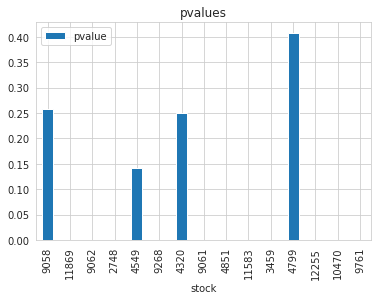

In [45]:
df_res[['pvalue']].plot(kind='bar')
plt.title('pvalues')

Text(0.5,1,'statistic')

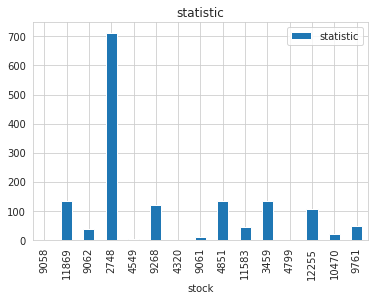

In [48]:
df_res[['statistic']].plot(kind='bar')
plt.title('statistic')

## Conclusion

For 4 stocks the pvalue is high (>0.1) which means that the best LSTMs we trained so far are not much different than QUE+LOG for these stocks.

Of course in that case p-value says only that algorithms differ. To have a final proof that LSTMs are better we need also compare the scores.



Does `statistic` yield any information? How to interpret it? 

`The test statistic is the chisquare statistic if exact is false. If the exact binomial distribution is used, then this contains the min(n1, n2), where n1, n2 are cases that are zero in one sample but one in the other sample.` 

-- from the statsmodels docs.